In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import matplotlib.pyplot as plt

In [2]:
# Set a seed for reproducibility
np.random.seed(42)

In [3]:
# Generate data for a two-way ANOVA
data = {'A': np.repeat(['A1', 'A2', 'A3'], 30),
        'B': np.tile(np.repeat(['B1', 'B2', 'B3'], 10), 3),
        'Value': np.random.normal(loc=50, scale=10, size=90)}

df = pd.DataFrame(data)
df

,A,B,Value
0,A1,B1,54.967142
1,A1,B1,48.617357
2,A1,B1,56.476885
3,A1,B1,65.230299
4,A1,B1,47.658466
...,...,...,...
85,A3,B3,44.982430
86,A3,B3,59.154021
87,A3,B3,53.287511
88,A3,B3,44.702398


In [4]:
# Fit the two-way ANOVA model
formula = 'Value ~ A + B + A:B'
model = ols(formula, df).fit()
anova_results = anova_lm(model)

In [5]:
# Print the ANOVA results
print("Two-way ANOVA results:")
print(anova_results)

Two-way ANOVA results:
            df       sum_sq     mean_sq         F    PR(>F)
A          2.0    62.869308   31.434654  0.375555  0.688097
B          2.0   316.167613  158.083807  1.888655  0.157877
A:B        4.0   620.868420  155.217105  1.854406  0.126486
Residual  81.0  6779.844323   83.701782       NaN       NaN


In [6]:
# Interpret the results
alpha = 0.05
p_value_A = anova_results['PR(>F)']['A']
p_value_B = anova_results['PR(>F)']['B']
p_value_interaction = anova_results['PR(>F)']['A:B']

In [7]:
if p_value_A < alpha:
    print("Reject the null hypothesis for factor A.")
else:
    print("Fail to reject the null hypothesis for factor A.")

Fail to reject the null hypothesis for factor A.


In [8]:
if p_value_B < alpha:
    print("Reject the null hypothesis for factor B.")
else:
    print("Fail to reject the null hypothesis for factor B.")

Fail to reject the null hypothesis for factor B.


In [9]:
if p_value_interaction < alpha:
    print("Reject the null hypothesis for the interaction term.")
else:
    print("Fail to reject the null hypothesis for the interaction term.")

Fail to reject the null hypothesis for the interaction term.


#### Visualize the critical regions

In [45]:
# Generate data for a two-way ANOVA
data = {'A': np.repeat(['A1', 'A2', 'A3'], 30),
        'B': np.tile(np.repeat(['B1', 'B2', 'B3'], 10), 3),
        'Value': np.random.normal(loc=50, scale=10, size=90)}

df = pd.DataFrame(data)

In [46]:
# Fit the two-way ANOVA model
formula = 'Value ~ A + B + A:B'
model = ols(formula, df).fit()
anova_results = anova_lm(model)

In [47]:
# Degrees of freedom for factors A, B, and interaction
df_A = model.df_model
df_B = model.df_model
df_interaction = model.df_model * model.df_model
df_residual = model.df_resid

In [48]:
# Significance level (alpha)
alpha = 0.05

In [49]:
# Critical values from the F-distribution
critical_value_A = stats.f.ppf(1 - alpha, df_A, df_residual)
critical_value_B = stats.f.ppf(1 - alpha, df_B, df_residual)
critical_value_interaction = stats.f.ppf(1 - alpha, df_interaction, df_residual)


In [50]:
# Extract F-statistic values for each factor and interaction
f_stat_A = anova_results['F']['A']
f_stat_B = anova_results['F']['B']
f_stat_interaction = anova_results['F']['A:B']

In [51]:
# Plotting the F-distribution and shading the critical region for Factor A
x_A = np.linspace(0, 5, 1000)
y_A = stats.f.pdf(x_A, df_A, df_residual)

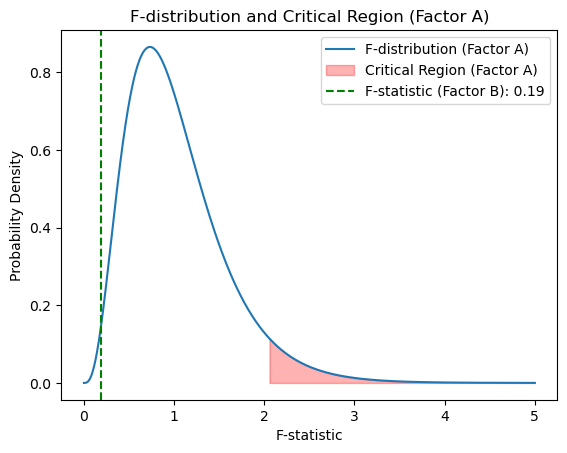

In [52]:
plt.plot(x_A, y_A, label='F-distribution (Factor A)')
plt.fill_between(x_A, y_A, where=(x_A > critical_value_A), color='red', alpha=0.3, label='Critical Region (Factor A)')

# Mark the F-statistic for Factor B as a vertical line
plt.axvline(x=f_stat_B, color='green', linestyle='--', label=f'F-statistic (Factor B): {f_stat_B:.2f}')

# Set labels and legend
plt.title('F-distribution and Critical Region (Factor A)')
plt.xlabel('F-statistic')
plt.ylabel('Probability Density')
plt.legend()

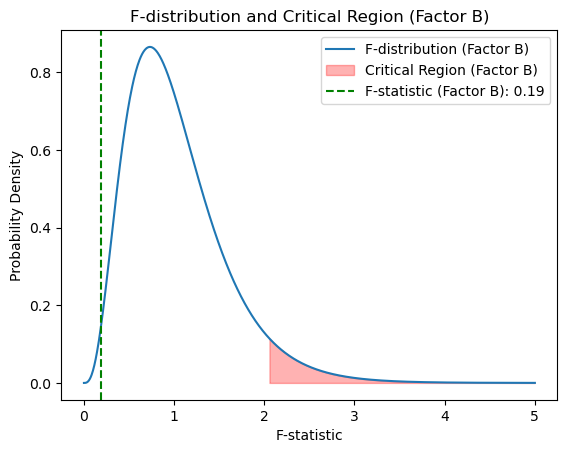

In [53]:
# Plotting the F-statistic and shading the critical region for Factor B
x_B = np.linspace(0, 5, 1000)
y_B = stats.f.pdf(x_B, df_B, df_residual)

plt.plot(x_B, y_B, label='F-distribution (Factor B)')
plt.fill_between(x_B, y_B, where=(x_B > critical_value_B), color='red', alpha=0.3, label='Critical Region (Factor B)')

# Mark the F-statistic for Factor B as a vertical line
plt.axvline(x=f_stat_B, color='green', linestyle='--', label=f'F-statistic (Factor B): {f_stat_B:.2f}')

# Set labels and legend
plt.title('F-distribution and Critical Region (Factor B)')
plt.xlabel('F-statistic')
plt.ylabel('Probability Density')
plt.legend()